In [1]:
import pandas as pd
import numpy as np
from vega_datasets import data
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = data.sf_temps()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [5]:
df = df.set_index('date')

In [6]:
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


# Use the above dataset for the exercises below:

## Resample by the day and take the average temperature. Visualize the average temperature over time.


<Figure size 720x576 with 0 Axes>

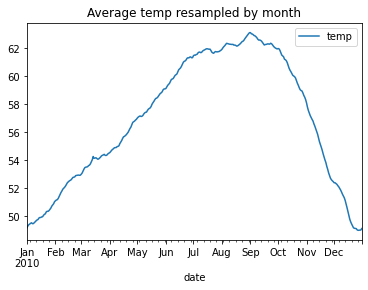

In [7]:
plt.figure(figsize=(10,8))
df.resample('D').mean().plot()
plt.title('Average temp resampled by month')
plt.show()

## Write the code necessary to visualize the minimum temperature over time.

<Figure size 720x576 with 0 Axes>

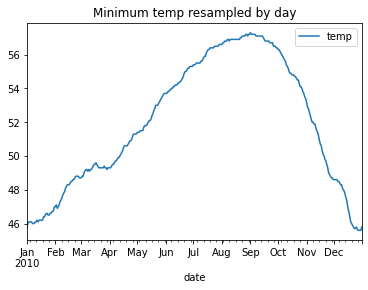

In [8]:
plt.figure(figsize=(10,8))
df.resample('D').min().plot()
plt.title('Minimum temp resampled by day')
plt.show()

## Write the code necessary to visualize the maximum temperature over time.


<Figure size 720x576 with 0 Axes>

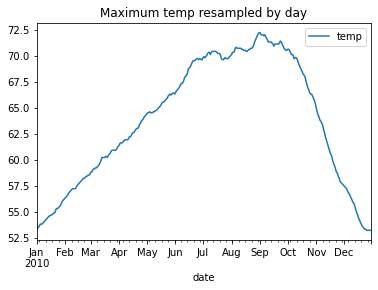

In [9]:
plt.figure(figsize=(10,8))
df.resample('D').max().plot()
plt.title('Maximum temp resampled by day')
plt.show()

## Which month is the coldest, on average?


In [10]:
df.resample('M').mean().sort_values('temp').head(1)

,temp
date,
2010-01-31,49.98414


## Which month has the highest average temperature?

In [11]:
df.resample('M').mean().sort_values('temp', ascending=False).head(1)

,temp
date,
2010-09-30,62.487083


## Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [12]:
daily = df.resample('D').agg(['max', 'min'])

In [13]:
daily['diff'] = daily.temp['max'] - daily.temp['min']

In [46]:
daily.resample('M').max().sort_values('diff', ascending=False).head(1)

temp        diff   min   max       mean
             max   min                             
date                                               
2010-08-31  72.2  57.2  15.0  57.2  72.2  63.129167

## Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


In [15]:
daily['min'] = df.resample('D').min()
daily['max'] = df.resample('D').max()
daily['mean'] = df.resample('D').mean()

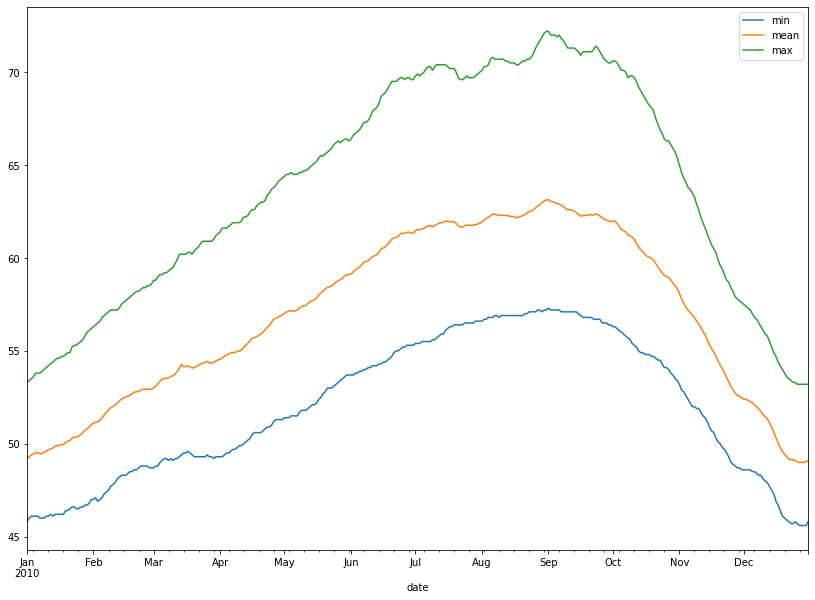

In [16]:
plt.figure(figsize=(14,10))
daily['min'].plot(label='min')
daily['mean'].plot(label='mean')
daily['max'].plot(label='max')
plt.legend()
plt.show()

# Use the dataset to answer the following questions:

In [49]:
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [51]:
df = df.set_index('date')

## Which year and month combination has the highest amount of precipitation?

In [52]:
df.resample('M').sum().sort_values('precipitation', ascending=False).head(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


## Visualize the amount of monthly precipitation over time.

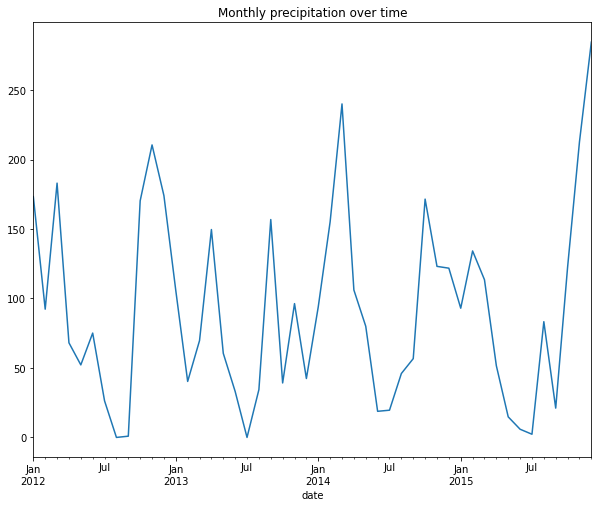

In [53]:
plt.figure(figsize=(10,8))
df.resample('M').sum().precipitation.plot()
plt.title('Monthly precipitation over time')
plt.show()

## Visualize the amount of wind over time. Choose a time interval you think is appropriate.

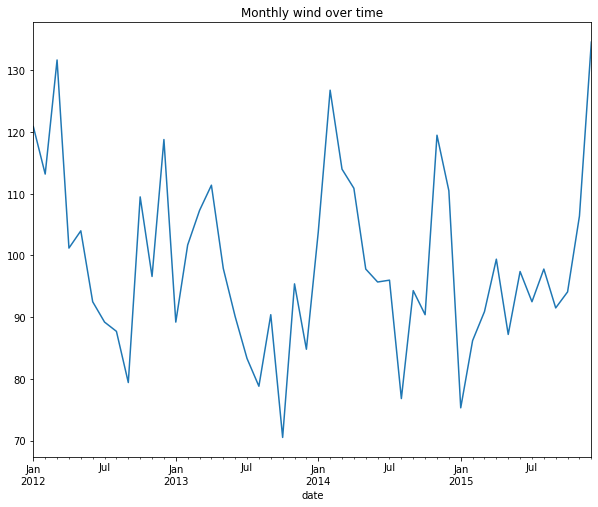

In [54]:
plt.figure(figsize=(10,8))
df.resample('M').sum().wind.plot()
plt.title('Monthly wind over time')
plt.show()

## Which year-month combination is the windiest?


In [57]:
df.resample('M').mean().sort_values('wind', ascending=False).head(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2014-02-28,5.542857,8.2,2.635714,4.528571


## What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [58]:
df['sunny'] = np.where(df.weather == 'sun', 1,0)

In [59]:
df.resample('Y').mean().sort_values('sunny', ascending=False).head(1)

,precipitation,temp_max,temp_min,wind,sunny
date,,,,,
2014-12-31,3.377534,16.99589,8.662466,3.387671,0.578082


## In which month does it rain the most?

In [60]:
df['rainy'] = np.where(df.weather == 'rain', 1,0)

In [61]:
df['month'] = df.index.month_name()

In [63]:
df.groupby('month').sum().sort_values('rainy').tail(1)

,precipitation,temp_max,temp_min,wind,sunny,rainy
month,,,,,,
February,422.0,1114.2,458.2,427.9,30,40


## Which month has the most number of days with a non-zero amount of precipitation?

In [29]:
no_rain = df[df.rainy == 0]

In [30]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,sunny,rainy,month
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,0,0,January
2012-01-02,10.9,10.6,2.8,4.5,rain,0,1,January
2012-01-03,0.8,11.7,7.2,2.3,rain,0,1,January
2012-01-04,20.3,12.2,5.6,4.7,rain,0,1,January
2012-01-05,1.3,8.9,2.8,6.1,rain,0,1,January


In [66]:
df.resample('M').sum().sort_values('rainy').tail() # change resample to groupby for month name

,precipitation,temp_max,temp_min,wind,sunny,rainy
date,,,,,,
2012-06-30,75.1,560.8,314.4,92.5,10,19
2012-04-30,68.1,446.2,179.8,101.2,8,19
2013-02-28,40.3,265.1,121.1,101.7,2,23
2012-12-31,174.0,224.3,102.1,118.8,1,23
2012-11-30,210.5,339.8,156.8,96.6,2,25


# Use the dataset to answer the following questions:

In [67]:
df = data.flights_20k()
df.head()
df.set_index('date')

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK
2001-01-19 13:05:00,-6,1489,SEA,MCI
2001-02-07 11:37:00,-16,1848,MCO,PHX


## Convert any negative delays to 0.

In [69]:
df['delay'] = np.where(df.delay < 0, 0, df.delay)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [71]:
df = df.set_index('date')

## Which hour of the day has the highest average delay?


In [72]:
df['hour'] = df.index.hour

In [73]:
df.groupby('hour').mean().sort_values('delay').tail(1)

,delay,distance
hour,,
3,302.5,322.0


## Does the day of the week make a difference in the delay amount?

In [74]:
df['day'] = df.index.day_name()

In [75]:
df.groupby('day').mean().sort_values('delay')

,delay,distance,hour
day,,,
Monday,7.165772,505.032215,13.454362
Saturday,8.431498,550.889031,13.010670
Tuesday,9.410866,496.021732,13.397963
Sunday,10.413542,507.987758,14.236419
Wednesday,11.032478,501.009094,13.588828
Thursday,12.821322,485.175025,13.619728
Friday,17.757596,501.118230,13.667107


# Does the month make a difference in the delay amount?

In [76]:
df['month'] = df.index.month_name()

In [77]:
df.groupby('month').mean().sort_values('delay')

,delay,distance,hour
month,,,
March,9.875287,504.712069,13.531897
January,11.301592,500.391952,13.552771
February,12.306106,511.156170,13.644182


# Use the dataset to answer the following questions:

In [42]:
df = data.iowa_electricity()
df = df.set_index('year')
df.head()


,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2002-01-01,Fossil Fuels,35991
2003-01-01,Fossil Fuels,36234
2004-01-01,Fossil Fuels,36205
2005-01-01,Fossil Fuels,36883


In [43]:
df['years'] = df.index.year

In [44]:
df.groupby('years').sum().to_dict()

{'net_generation': {2001: 40651,
  2002: 42528,
  2003: 42107,
  2004: 43236,
  2005: 44145,
  2006: 45473,
  2007: 49778,
  2008: 53086,
  2009: 51859,
  2010: 57509,
  2011: 56371,
  2012: 56675,
  2013: 56670,
  2014: 56854,
  2015: 56653,
  2016: 54381,
  2017: 56476}}

In [45]:
df['%_gen'] = df['years'].map(total_gen['net_generation'])

NameError: name 'total_gen' is not defined

In [ ]:
df['%_gen'] = round(df.net_generation / df['%_gen'], 2) * 100

In [ ]:
df.head()

In [ ]:
df.source.value_counts()

## Lineplot of generation over time, color by source


In [ ]:
plt.figure(figsize=(14,10))
df[df.source=='Fossil Fuels'].net_generation.plot(label='Fossil Fuels')
df[df.source=='Nuclear Energy'].net_generation.plot(label='Nuclear Energy')
df[df.source=='Renewables'].net_generation.plot(label='Renewables')
plt.legend()
plt.show()

# Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [ ]:
pivot = pd.pivot_table(data=df, columns='years' ,index='source', values='net_generation')
pivot

## Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

In [ ]:
plt.figure(figsize=(14,10))
pivot.loc['Fossil Fuels'].plot()
pivot.loc['Nuclear Energy'].plot()
pivot.loc['Renewables'].plot()
plt.legend()
plt.show()